In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from io import BytesIO
import pandas_datareader.data as dat_aq
from datetime import datetime, timedelta

import rec_mod as rm
skrec = rm.rec_periods('KORRECD')
skrec = skrec.astype(int)

D:\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
sg10y = rm.pull_data('ticker=SSG_IR.M70007115.M.SG', 'econdb', start_time = datetime(2000,1,1), end_time = datetime(2018,10,1))
sg3m = rm.pull_data('ticker=SSG_IR.M7000714.M.SG', 'econdb', start_time = datetime(2000,1,1), end_time = datetime(2018,10,1))
sg_spread = pd.DataFrame(sg10y.iloc[:,0] - sg3m.iloc[:,0], columns = ['spread'])
sg_gdp = rm.pull_data('ticker=SSG_GDP.M0144611.Q.SG', 'econdb', start_time = datetime(1999,10,1), end_time = datetime(2018,10,1))
sg_gdp_chg = rm.ready_data(sg_gdp, 'pct_chg')
#print(df.iloc[1])
print(sg_spread)

               spread
TIME_PERIOD          
2000-01-01   2.610000
2000-04-01   2.720000
2000-07-01   2.796667
2000-10-01   2.500000
2001-01-01   1.930000
...               ...
2017-10-01   1.953333
2018-01-01   2.143333
2018-04-01   2.420000
2018-07-01   2.286667
2018-10-01   2.350000

[76 rows x 1 columns]


D:\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


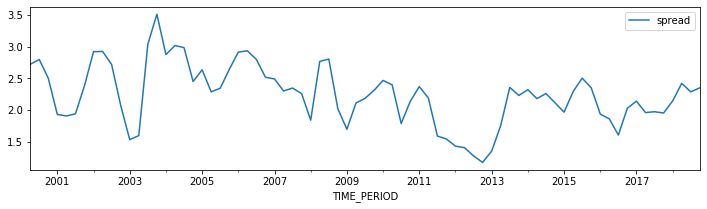

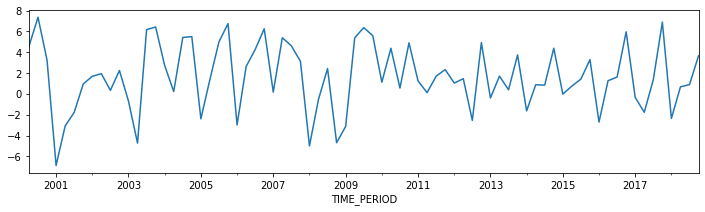

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                  pct_chg   No. Observations:                   71
Model:             MarkovAutoregression   Log Likelihood                -163.684
Date:                  Thu, 30 Apr 2020   AIC                            349.367
Time:                          16:28:05   BIC                            374.257
Sample:                      04-01-2000   HQIC                           359.265
                           - 10-01-2018                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4467      0.974     -3.537      0.000      -5.356      -1.537
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0934      0.754      2.777      0.005       0.616       3.571
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         3.7211      0.645      5.767      0.000       2.457       4.986
ar.L1         -0.0215      0.085     -0.253      0.800      -0.188       0.145
ar.L2         -0.0241      0.082     -0.293      0.770      -0.186       0.137
ar.L3          0.0325      0.082      0.396      0.692      -0.128       0.194
ar.L4          0.6816      0.085      8.034      0.000       0.515       0.848
                           Regime transition parameters                          
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
p[0->0].tvtp0     8.4377      4.625      1.824      0.068      -0.627      17.503
p[1->0].tvtp0    -3.6695      3.209     -1.143      0.253      -9.960       2.621
p[0->0].tvtp1    -3.0454      1.799     -1.692      0.091      -6.572       0.481
p[1->0].tvtp1     0.3222      1.363      0.236      0.813      -2.348       2.993
=================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [3]:
result, model = rm.SOP_Phase_1(sg_gdp_chg, 'Markov_Filardo', 2, 4, exog = sg_spread)
result.summary()

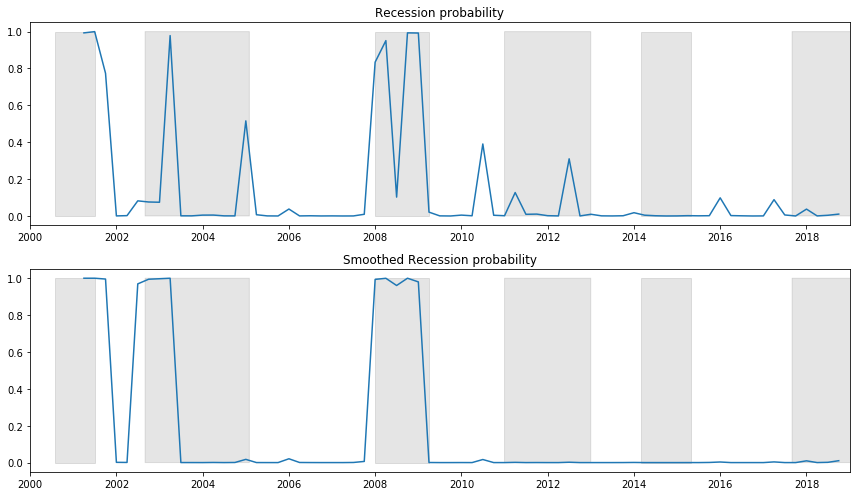

0.6141194084003708
precision =  1.628347820181669
0.602755218009244
smooth_precision =  1.6590482672265539


In [4]:
rm.rec_prob_graph(result, skrec, datetime(2000,1,1), datetime(2019,1,1))

In [12]:
x = result.expected_durations.dropna()
x[0].mean()

14.758269902141596